<a href="https://colab.research.google.com/github/keizikang/self_study_mldl/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_4%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4장. 다양한 분류 알고리즘: 럭키백의 확률을 계산하라!

---
## 4-1. 로지스틱 회귀

---



In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

import sys
sys.path.append("/content/gdrive/MyDrive")
from bream_smelt import *
# original data: bit.ly/bream_list, bit.ly/smelt_list

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


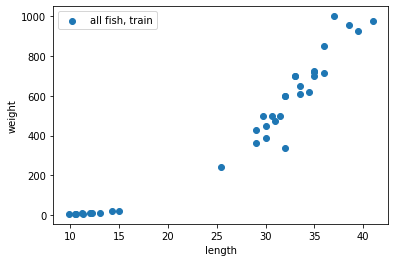

In [3]:
import numpy as np

fish_length = np.array(bream_length + smelt_length)
fish_weight = np.array(bream_weight + smelt_weight)
fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.array([1] * len(bream_length) + [0] * len(smelt_length))

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

import matplotlib.pyplot as plt

plt.scatter(*train_input.T, label='all fish, train')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

[1]


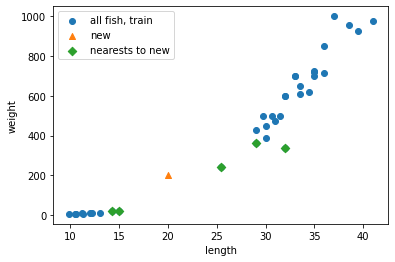

In [4]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

new = np.array([20, 200])
print(kn.predict([new]))
_, indices = kn.kneighbors([new])

import matplotlib.pyplot as plt

plt.scatter(*train_input.T, label='all fish, train')
plt.scatter(*new.T, marker='^', label='new')
plt.scatter(*train_input[indices, :].T, marker='D', label='nearests to new')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [5]:
print(kn.classes_)
print(kn.predict_proba([new]))

[0 1]
[[0.4 0.6]]


In [11]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [22]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input, train_target)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [43]:
# 도미, 빙어 데이터만 따로 뽑아냄
bream_smelt_indices = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indices]
target_bream_smelt = train_target[bream_smelt_indices]

# 로지스틱 회귀 모델 훈련시킴
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)
print(f'분류 클래스: {lr.classes_}')
print('='*64)

# 첫 다섯 마리의 특성값 확인
print('첫 다섯 마리의 특성값')
print(train_bream_smelt[:5])
print('='*64)

# 첫 다섯 마리의 예측값 확인
print('첫 다섯 마리의 예측값')
print(lr.predict(train_bream_smelt[:5]))
print('='*64)

# 첫 다섯 마리의 타겟(정답)
print('첫 다섯 마리의 타겟값')
print(target_bream_smelt[:5])

분류 클래스: ['Bream' 'Smelt']
첫 다섯 마리의 특성값
[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]]
첫 다섯 마리의 예측값
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
첫 다섯 마리의 타겟값
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [24]:
# 계수 확인
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [25]:
# z 값 확인
decision = lr.decision_function(train_bream_smelt[:5])
print(decision)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [31]:
# 확률 확인
from scipy.special import expit
print(expit(decision))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [33]:
lr.predict_proba(train_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [44]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(f'분류 클래스: {lr.classes_}')
print(f'훈련 세트 점수:   {lr.score(train_scaled, train_target)}')
print(f'테스트 세트 점수: {lr.score(test_scaled, test_target)}')

분류 클래스: ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
훈련 세트 점수:   0.9327731092436975
테스트 세트 점수: 0.925


In [39]:
print('첫 다섯 마리의 예측값')
print(lr.predict(test_scaled[:5]))
print('='*64)
print('첫 다섯 마리의 타겟값')
print(test_target[:5])

첫 다섯 마리의 예측값
['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
첫 다섯 마리의 타겟값
['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch']


In [67]:
# 계수 확인
print(np.round(lr.coef_, decimals=3))
print(np.round(lr.intercept_, decimals=3))

[[-1.49  -1.029  2.593  7.704 -1.201]
 [ 0.196 -2.011 -3.78   6.505 -1.995]
 [ 3.563  6.344 -8.49  -5.758  3.793]
 [-0.105  3.603  3.931 -3.617 -1.751]
 [-1.401 -6.075  5.26  -0.872  1.86 ]
 [-1.385  1.492  1.392 -5.677 -4.401]
 [ 0.621 -2.324 -0.907  1.716  3.694]]
[-0.092 -0.263  3.251 -0.147  2.655 -6.788  1.384]


In [68]:
# z 값 확인
print('0번 생선의 z 값: 직접 계산')
print(np.round(np.sum(lr.coef_ * test_scaled[0], axis=1) + lr.intercept_, decimals=3))
print('='*64)

print('0번 생선의 z 값: decition_function')
print(np.round(lr.decision_function(test_scaled[0].reshape(1, -1)), decimals=3))

0번 생선의 z 값: 직접 계산
[-6.498  1.032  5.164 -2.729  3.339  0.327 -0.634]
0번 생선의 z 값: decition_function
[[-6.498  1.032  5.164 -2.729  3.339  0.327 -0.634]]


In [66]:
# 확률 확인
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [70]:
decision = lr.decision_function(test_scaled[:5])

from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


---

## 4-2. 확률적 경사 하강법

---

In [ ]:
# 데이터를 불러옴
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish.head()

# 입력은 Species를 제외한 나머지 5개 컬럼, Species는 타겟
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
# 입력은 Species를 제외한 나머지 5개 컬럼, Species는 타겟
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
# 훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

# 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# 확률적 경사 하강법은 SGDClassifier를 사용함
# SGD = Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(f'훈련 세트 점수: {sc.score(train_scaled, train_target)}')
print(f'테스트 세트 점수: {sc.score(test_scaled, test_target)}')

훈련 세트 점수: 0.773109243697479
테스트 세트 점수: 0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
# SGD는 SGDClassifier 객체를 새로 만들지 않고 데이터만 추가할 수 있음
# partial_fit() 메서드를 사용
sc.partial_fit(train_scaled, train_target) # 에포크를 한 번 더 실행한 것과 같음
print(f'훈련 세트 점수: {sc.score(train_scaled, train_target)}')
print(f'테스트 세트 점수: {sc.score(test_scaled, test_target)}')

# 참고: SGDClassifier에 train_scaled 전체를 전달했지만
#      실제로는 내부적으로 샘플을 1개씩 꺼내서 SGD를 수행함
#      따라서 배치 경사 하강법이 아님
#      SGDClassifier는 미니배치나 배치 하강법은 제공하지 않음

훈련 세트 점수: 0.8151260504201681
테스트 세트 점수: 0.85


AttributeError: ignored

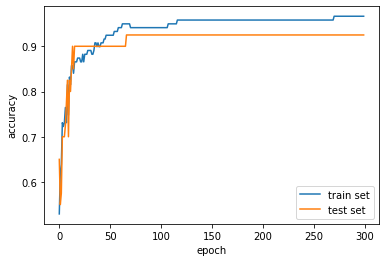

In [ ]:
# 에포크 횟수가 적으면 충분한 학습을 못하므로 과소적합이 될 수 있음
# 에포크 횟수가 많으면 훈련 세트에 과하게 맞춰져서 과대적합이 될 수 있음
# 그래프로 확인해보자

import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

# 300 에포크를 돌면서 훈련 세트와 테스트 세트의 점수를 보겠음
for _ in range(300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    # Q1. fit()을 안하고 처음부터 partial_fit을 해도 되네?
    # Q2. classes는 왜 하는거지?
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt
plt.plot(train_score, label='train set')
plt.plot(test_score, label='test set')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
print(plt.get_visible
plt.show()
    

In [2]:
import sklearn
sklearn.__version__

'1.0.2'